<a href="https://colab.research.google.com/github/darsh0820/Deep-Learning_Image-Classification/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron

##Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

##Preparing the data

### Loading dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Normalizing the pixel values
(Skip if using Batch Normalization)

In [3]:
## Normalize the pixel values to be between 0 and 1
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0

### Flatten the images

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

##Creating the model

### Create the model

In [5]:
model = models.Sequential()

### Adding Layers

In [6]:
# Add layers to the model but normalize before every layer
model.add(layers.BatchNormalization())

# Input layer with 784 inputs and 100 neurons
model.add(layers.Dense(100, activation='relu', input_shape=(784,)))
model.add(layers.BatchNormalization())

# Hidden layer with 64 neurons
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())

# Output layer with 10 outputs for classification
model.add(layers.Dense(10, activation='softmax'))

### Compiling with optimizer and loss function

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Building the model

In [8]:
# Build the model by specifying the input shape
model.build(input_shape=(None, 784))  # 'None' allows for variable batch sizes

### Summarizing the model

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 batch_normalization_2 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                        

##Training the model

In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2702 - accuracy: 0.9194
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1317 - accuracy: 0.9597
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1031 - accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0855 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9761


##Model Evaluation

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.6505 - accuracy: 0.9677 - 705ms/epoch - 2ms/step

Test accuracy: 0.9677000045776367


##Plotting prediction results

### Predicted values

313/313 [==============================] - 1s 2ms/step


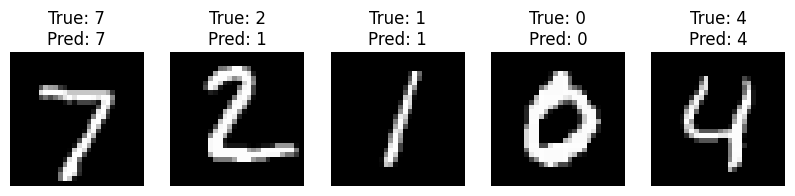

In [12]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(X_test)

def plot_images(images, labels, predictions, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {labels[i]}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

plot_images(X_test, y_test, predictions)

##Confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
# Convert predicted probabilities to class labels
predictions = np.argmax(predictions, axis=1)

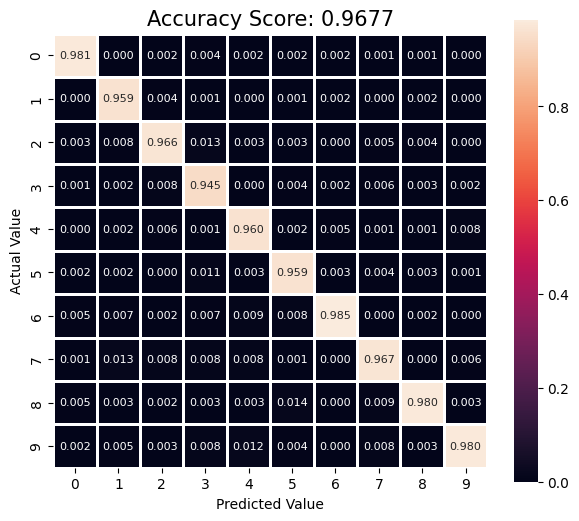

In [15]:
cm = confusion_matrix(y_test, predictions , normalize='pred')

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.75, square = True, annot_kws={"size": 8})
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Accuracy Score: {:.4f}'.format(test_acc), size = 15)
plt.show()